## Seaborn: plotagem e visualização de dados
---

seaborn é uma biblioteca para visualização de dados, muito semelhante ao matplotlib, mas que oferece mais recursos, além de ter uma aparência mais agradável. Muitas de suas funcionalidades se sobrepõem às do matplotlib, sendo possível trabalhar com os dois ao mesmos tempo.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

este é um plot usando apenas matplotlib:

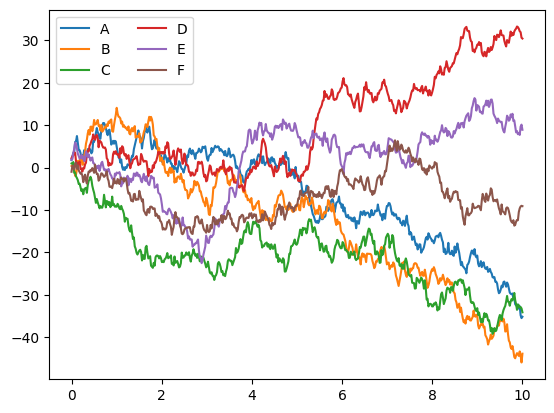

In [3]:
plt.plot(x, y)
plt.legend('ABCDEF', ncols=2)

este é um plot usando seaborn, observe como é simples mudar o estilo do gráfico:

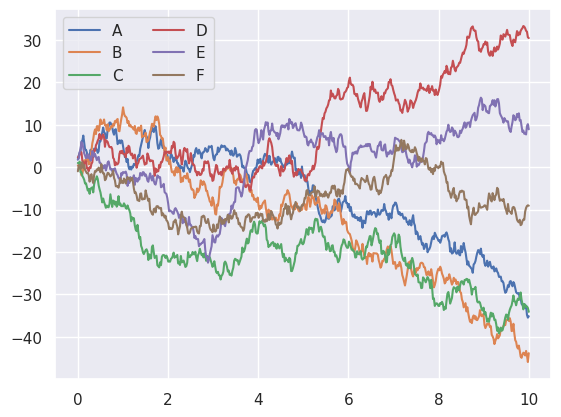

In [4]:
sns.set()
plt.plot(x, y)
plt.legend('ABCDEF', ncols=2)

#### histogramas, KDE e densidades
---

com matplotlib pode-se fazer histogramas:

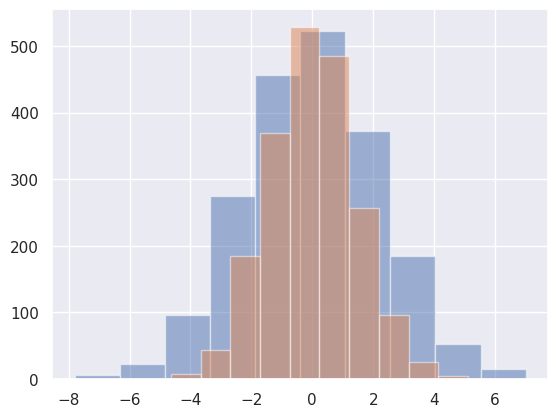

In [5]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], alpha=0.5)

com seaborn pode-se fazer histogramas e, ainda, uma estimativa da distribuição através da função `.kdeplot()`

<Axes: ylabel='Density'>

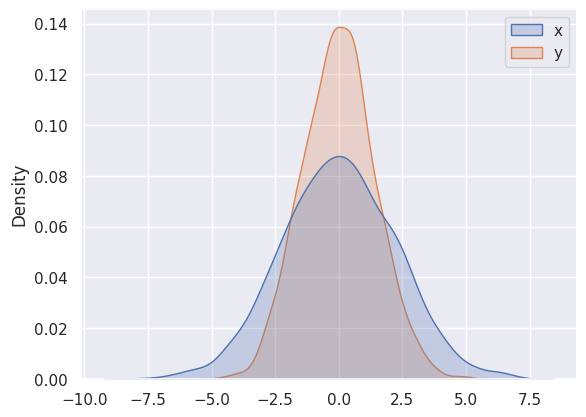

In [6]:
sns.kdeplot(data, fill=True)

o parâmetro `fill=` é respondsável por colorir a parte interna do gráfico.

É possível ver tanto o histograma propriamente dito como a estimativa de distribuição usando a função `.histplot()` e passando o parâmetro `kde=True`:

<Axes: ylabel='Density'>

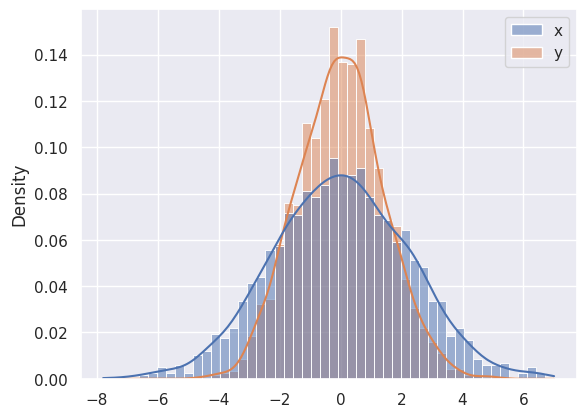

In [7]:
sns.histplot(data, kde=True, stat='density')

o parâmetro `stat=` recebendo o argumento `density` diz, justamente, sobre a distribuição dos dados, visto no eixo das ordenadas. Por padrão, `stat=` recebe `count`, que nada mais é que a contagem dos dados.

<Axes: ylabel='Count'>

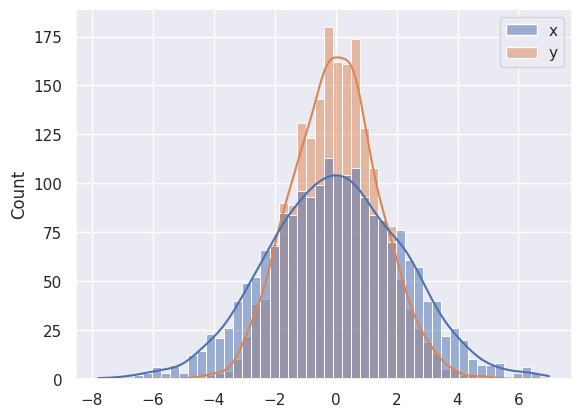

In [8]:
sns.histplot(data, kde=True)

é possível visualizar a distribuição conjunta e as distribuições marginais juntas usando a função `jointplot()`, que deve receber o conjunto de dados e pode, ainda, receber o nome para os eixos, neste caso, x e y, e o tipo de dado, neste caso, `kde` através do parâmetro `kind=`:

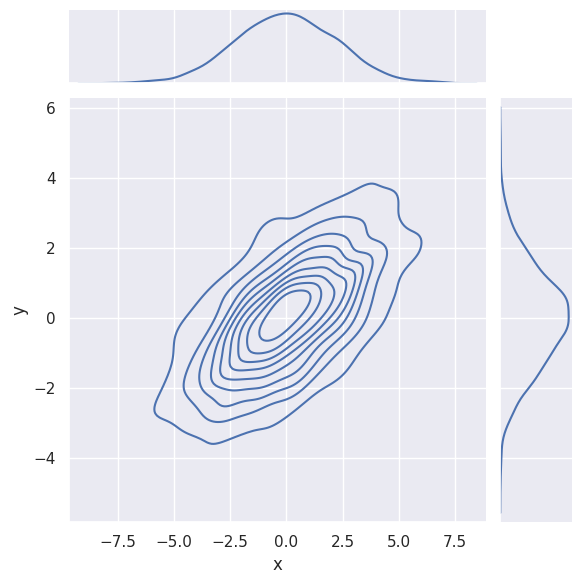

In [9]:
sns.jointplot(data, x='x', y='y', kind='kde')

sem todos aqueles parâmetros, este gráfico fica assim:

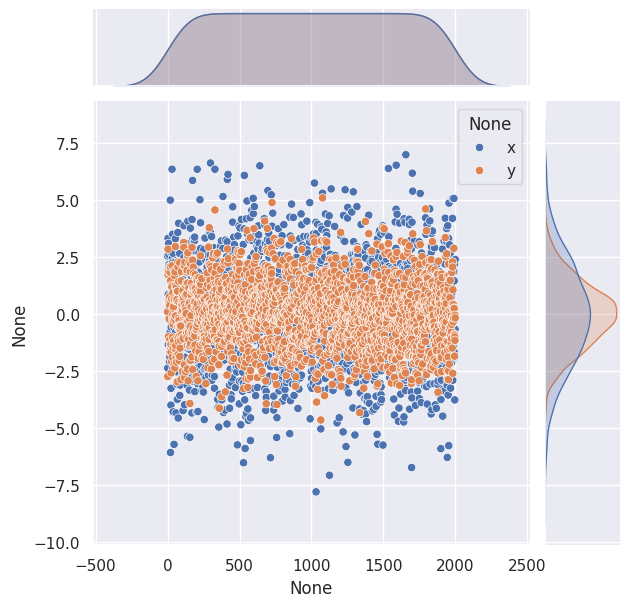

In [10]:
sns.jointplot(data)

o parâmetro `kind=` determina como os dados serão mostrados:

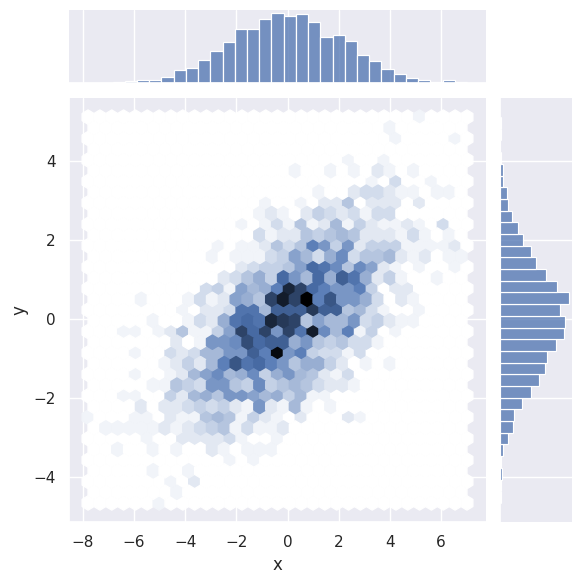

In [11]:
sns.jointplot(data, x='x', y='y', kind='hex')

todas as opções para `kind=` podem ser vistas escrevendo `sns.jointplot?` no ipython.

O `.jointplot()` ainda consegue mostrar estimação e regressão com o parâmetro `kind=` recebendo o argumento `reg`.

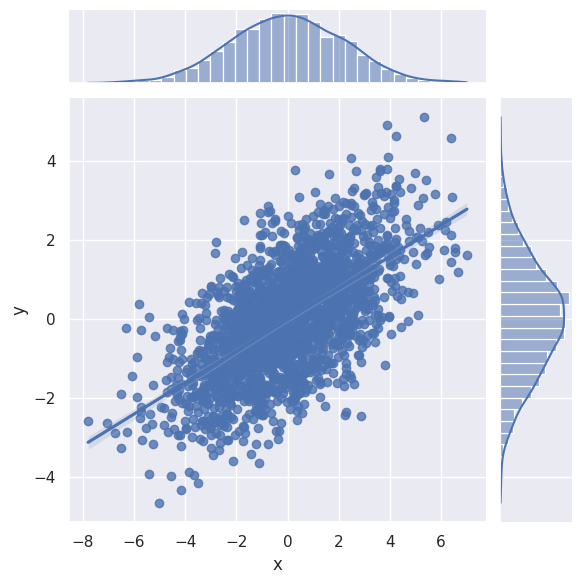

In [53]:
sns.jointplot(data, x='x', y='y', kind='reg')

#### plotagem em pares
---

quando se há vários dados que precisam ser plotados, deve-se usar os *pair plots*, que serve para fazer comparações entre estes dados. Veja o exemplo com o dataframe nativo do seaborn, contendo as medidas de pétalas e sépalas de três espécies de íris:

In [12]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


para visualizar as relações multidimensionais entre as amostras basta chamar a função `.pairplot()`:

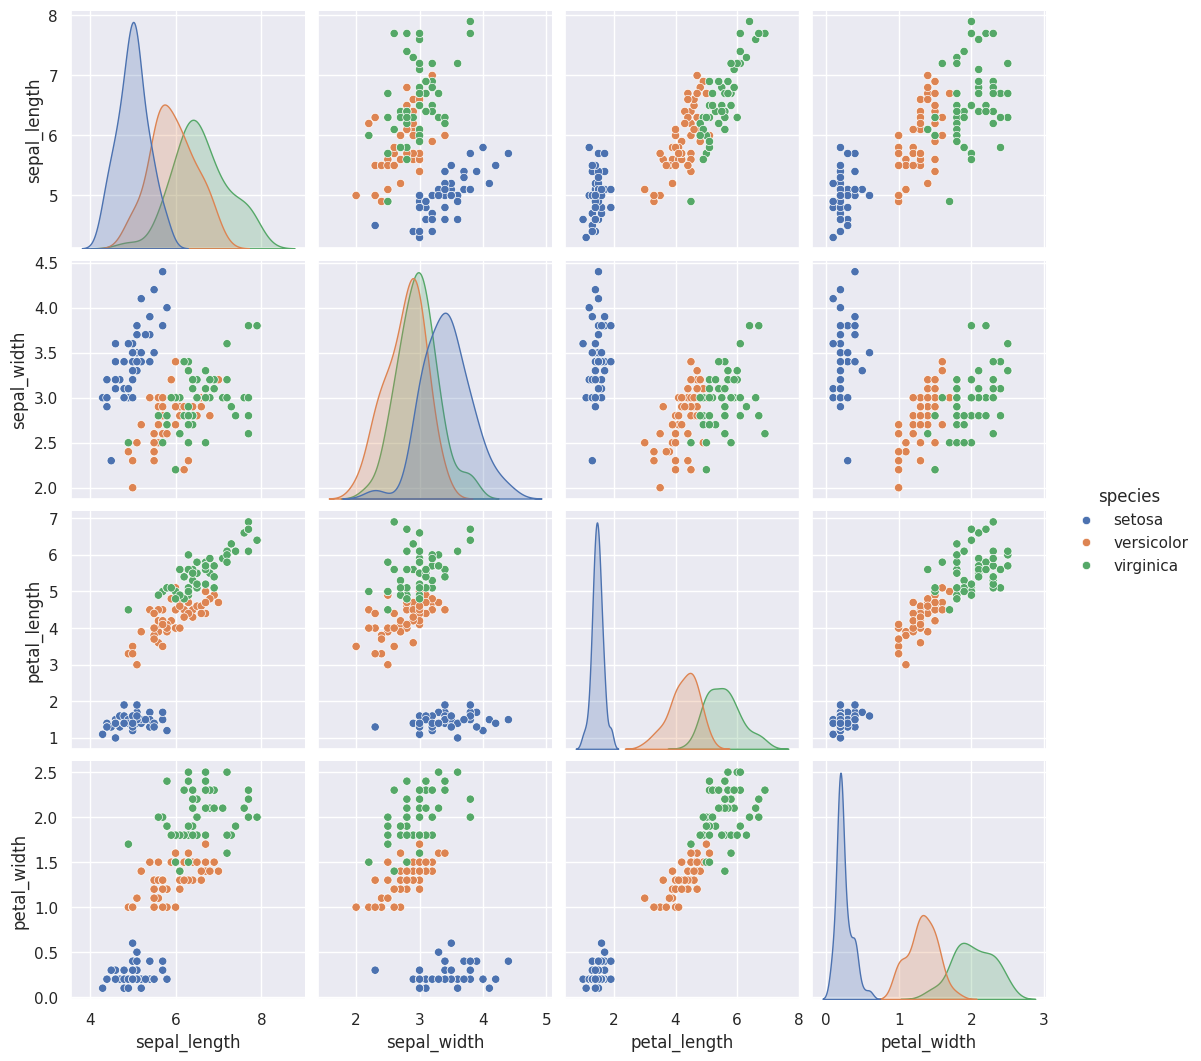

In [18]:
sns.pairplot(iris, hue='species', height=2.7)

o parâmetro `hue=` determina as cores baseados em valores através de vetores ou através de dados passados pelo usuário; neste caso, as cores diferenciam as espécies, conforme solicitado. `height=` recebe o tamanho que cada plot deve ter.

#### .FacetGrid()
---

às vezes, a melhor forma de visualizar diferentes dados é através de subconjuntos de histogramas. Para isto, basta usar a função `.FacetGrid()`. Veja o exemplo com o dataframe nativo do seaborn, contendo informações sobre gorjetas:

In [19]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


a função `.FacetGrid()` recebe os dados, as informações que irão nas coluna através do parâmetro `col=`, as informações que vão nas linhas por `row=` e `margin_titles=` que deve receber `True` e, assim, coloca o título das informaçãos das linhas nas linhas e o título das informações das colunas nas colunas. No entanto, esta função apenas cria a grade:

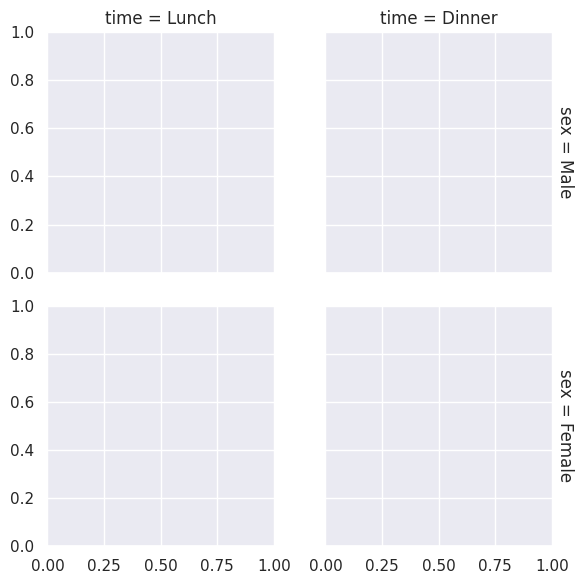

In [29]:
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)

então, é necessário passar as informações da apresentação do gráfico para o método `map`, que, neste caso, será usado o tipo histograma, `plt.hist`, e as informações que serão comparadas, neste caso, as gorjetas, `tip`.

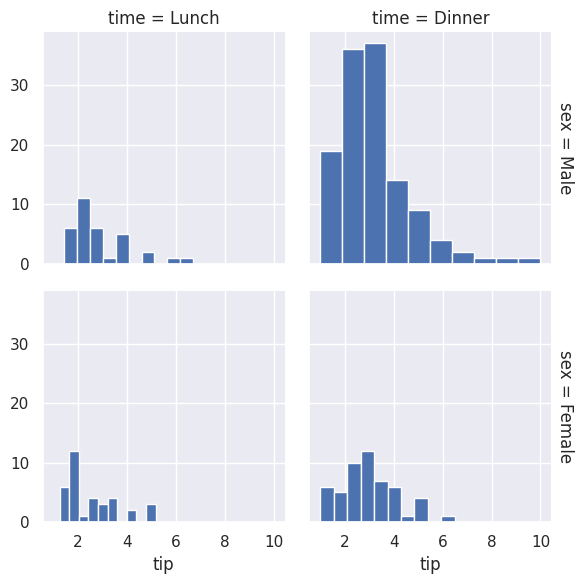

In [38]:
grids = sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)
grids.map(plt.hist, 'tip')

no gráficos, vê-se os valores de cada gorjeta baseado no sexo e no momento do dia. Assim, entende-se que homens no período da noite dão mais gorjeta, no valor de US\\$2 a US\\$2,50; já mulheres no período da tarde, dão menos, no valor de US\\$2 a US\\$2,50.

lembrando que os parâmetros `row=`, `col=` e `args=` devem receber colunas presentes no dataset.

#### .catplot()
---

é outra forma de comparar informações, desta vez, permitindo ver a distribuição dos parâmetros, bastando usar a função `.catplot()`. esta deve receber os dados em `data=`, os eixos `x=` e `y=`, os dados a ser comparados em `hue=`, e, se desejar, o tipo de gráfico em `kind=`.

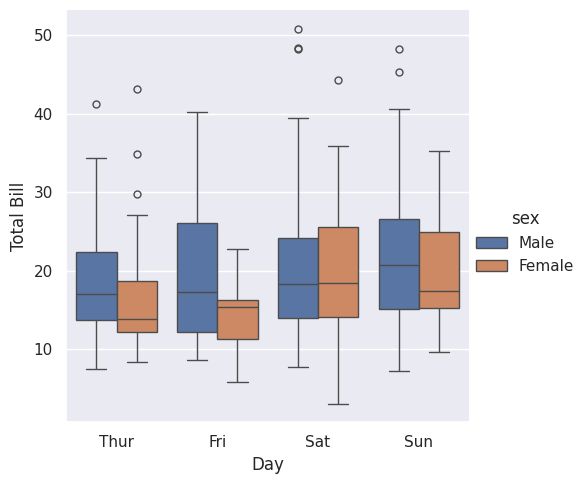

In [52]:
g = sns.catplot(data=tips, x='day', y='total_bill', hue='sex', kind='box')
g.set_axis_labels("Day", "Total Bill");

o método `.set_axis_labels=` serve para nomear os eixos.

pode, ainda, passar apenas uma informação de comparação, neste exemplo, apenas `x=`, para visualizar a comparação através de barras, passando `count` para `kind=`

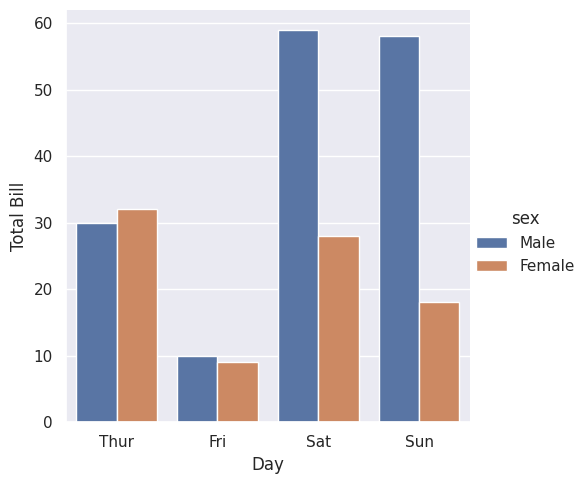

In [55]:
g = sns.catplot(data=tips, x='day', hue='sex', kind='count')
g.set_axis_labels("Day", "Total Bill");

passando o parâmetro `order=` é possível fazer uma categorização dos dados:

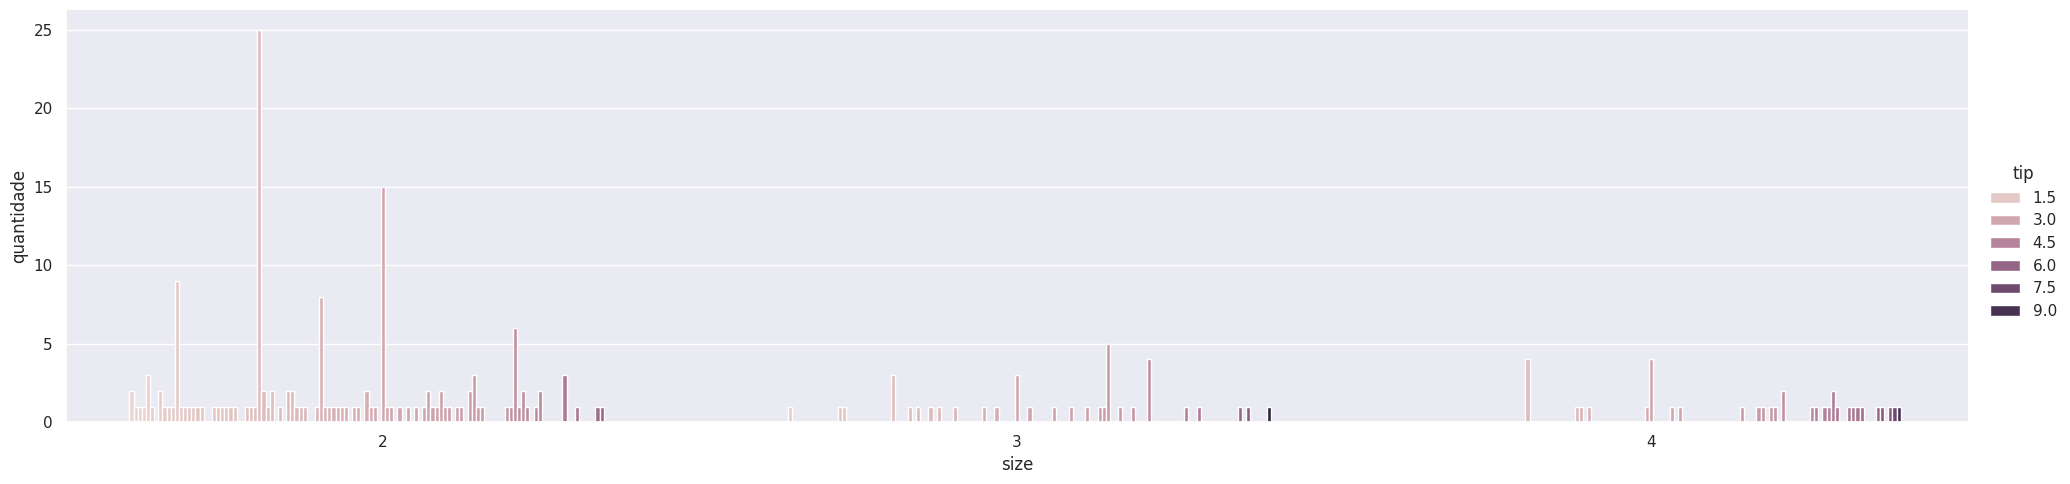

In [85]:
g = sns.catplot(data=tips, order=range(2, 5), x='size', aspect=4, kind='count', hue='tip')
g.set_ylabels('quantidade')

o parâmetro `aspect=` recebe o tamanho da janela do gráfico.

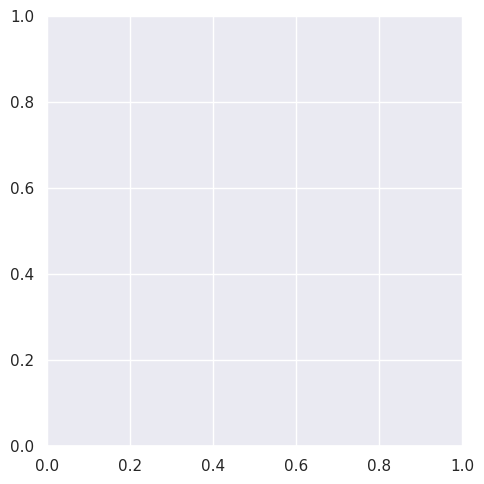

In [86]:
sns.catplot(aspect=1)

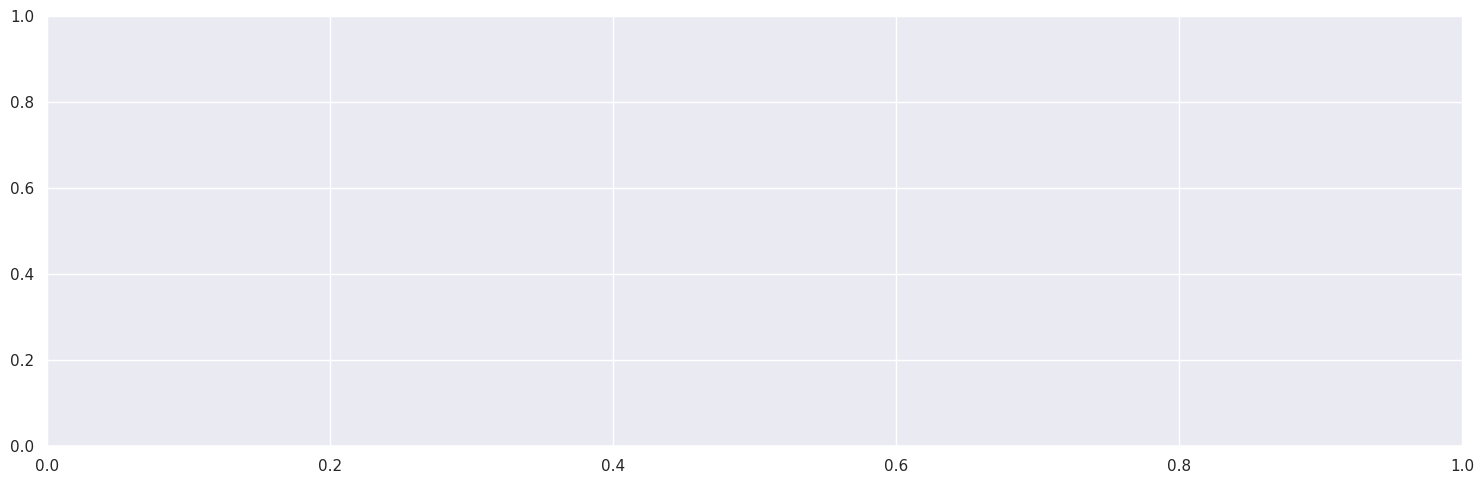

In [87]:
sns.catplot(aspect=3)